In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv("persona.csv")

In [3]:
df.sample(10)

,PRICE,SOURCE,SEX,COUNTRY,AGE
3448,29,android,female,bra,25
4947,9,ios,male,bra,24
1335,39,ios,male,usa,15
3069,39,android,male,usa,20
1226,29,android,female,usa,22
297,39,ios,female,deu,16
4879,39,android,male,bra,24
2213,49,android,female,usa,17
3943,29,android,female,usa,34
4361,49,ios,male,usa,30


In [4]:
df.shape

(5000, 5)

In [5]:
df.columns=[col.lower() for col in df.columns]

In [6]:
df["price"].nunique()

6

In [7]:
df.groupby("country")[["price"]].sum()

,price
country,
bra,51354
can,7730
deu,15485
fra,10177
tur,15689
usa,70225


In [8]:
df.groupby("source")[["price"]].mean()

,price
source,
android,34.174849
ios,34.069102


In [9]:
df.corr()

,price,age
price,1.000000,-0.010202
age,-0.010202,1.000000


In [10]:
agg_df = df.groupby(["country", "source","sex","age"])[["price"]].mean().sort_values("price", ascending=False)

In [11]:
agg_df.head(15)

price
country source  sex    age           
bra     android male   46   59.000000
usa     android male   36   59.000000
fra     android female 24   59.000000
usa     ios     male   32   54.000000
deu     android female 36   49.000000
                       51   49.000000
        ios     male   20   49.000000
usa     android female 47   49.000000
fra     ios     male   20   49.000000
usa     ios     male   59   46.500000
deu     android male   15   46.500000
bra     android female 30   45.666667
usa     android female 61   45.666667
tur     ios     male   24   45.000000
deu     android male   34   45.000000

In [12]:
agg_df.reset_index(inplace=True)

In [13]:
agg_df.tail()

,country,source,sex,age,price
343,usa,ios,female,38,19.0
344,usa,ios,female,30,19.0
345,can,android,female,27,19.0
346,fra,android,male,18,19.0
347,deu,android,male,26,9.0


In [14]:
agg_df.age.isnull().sum()

0

In [15]:
agg_df["age_cat"] = agg_df.age.apply(lambda x: "0_18" if x<18 else ("19_23" if x>=18 and x<24 else ("24_30" if x>=31 and x<40 else "41_70")))
#alternative agg_df["age_cat"]= pd.cut(agg_df["age"],[0,18,23,30,40,70], labels=['0_18', '19_23', '24_30', '31_40', '41_70']).astype("object")

In [16]:
agg_df.sample(14)

,country,source,sex,age,price,age_cat
145,usa,android,male,23,34.849057,19_23
104,tur,android,male,24,35.923077,41_70
220,usa,android,female,15,32.666667,0_18
111,tur,android,male,22,35.666667,19_23
295,usa,ios,female,42,29.000000,41_70
48,usa,ios,male,50,39.000000,41_70
39,can,android,male,30,40.250000,41_70
303,tur,android,female,56,29.000000,41_70
250,usa,ios,male,37,31.727273,24_30
88,bra,android,female,56,37.000000,41_70


In [17]:
agg_df["customer_level_based"]=agg_df["country"]+"_"+agg_df["source"]+"_"+agg_df["sex"]+"_"+agg_df["age_cat"]

In [18]:
agg_df.sample(12)

,country,source,sex,age,price,age_cat,customer_level_based
179,tur,ios,female,51,34.000000,41_70,tur_ios_female_41_70
63,usa,ios,female,17,38.459459,0_18,usa_ios_female_0_18
334,bra,android,female,28,22.333333,41_70,bra_android_female_41_70
42,tur,android,male,26,39.666667,41_70,tur_android_male_41_70
165,usa,android,female,21,34.185185,19_23,usa_android_female_19_23
14,deu,android,male,34,45.000000,24_30,deu_android_male_24_30
40,can,android,male,20,40.111111,19_23,can_android_male_19_23
322,deu,android,female,16,27.000000,0_18,deu_android_female_0_18
55,fra,ios,male,51,39.000000,41_70,fra_ios_male_41_70
166,bra,ios,female,54,34.000000,41_70,bra_ios_female_41_70


In [19]:
agg_df.groupby("customer_level_based")[["price"]].mean().head(12)

,price
customer_level_based,
bra_android_female_0_18,36.775132
bra_android_female_19_23,33.773753
bra_android_female_24_30,34.898326
bra_android_female_41_70,34.908758
bra_android_male_0_18,35.389796
bra_android_male_19_23,31.903378
bra_android_male_24_30,31.678571
bra_android_male_41_70,36.140759
bra_ios_female_0_18,34.367214


In [20]:
agg_df["segment"]=pd.qcut(agg_df.price, 4, labels=["D", "C", "B", "A"])

In [21]:
agg_df.reset_index(inplace=True)

In [22]:
agg_df.sample(9)

,index,country,source,sex,age,price,age_cat,customer_level_based,segment
158,158,bra,android,female,38,34.555556,24_30,bra_android_female_24_30,B
138,138,can,ios,male,16,35.000000,0_18,can_ios_male_0_18,B
119,119,bra,android,male,20,35.400000,19_23,bra_android_male_19_23,B
118,118,usa,android,male,41,35.428571,41_70,usa_android_male_41_70,B
159,159,usa,ios,female,33,34.555556,24_30,usa_ios_female_24_30,B
276,276,fra,ios,female,28,30.428571,41_70,fra_ios_female_41_70,D
110,110,bra,android,male,41,35.666667,41_70,bra_android_male_41_70,B
9,9,usa,ios,male,59,46.500000,41_70,usa_ios_male_41_70,A
77,77,can,android,female,18,37.333333,19_23,can_android_female_19_23,A


In [23]:
new_user="tur_ios_female_24_30"

In [24]:
agg_df[agg_df["customer_level_based"]==new_user]

,index,country,source,sex,age,price,age_cat,customer_level_based,segment
54,54,tur,ios,female,31,39.000000,24_30,tur_ios_female_24_30,A
326,326,tur,ios,female,38,25.666667,24_30,tur_ios_female_24_30,D


In [25]:
new_user_2="fra_ios_male_41_70"

In [26]:
agg_df[agg_df["customer_level_based"]==new_user_2]

,index,country,source,sex,age,price,age_cat,customer_level_based,segment
55,55,fra,ios,male,51,39.0,41_70,fra_ios_male_41_70,A
169,169,fra,ios,male,26,34.0,41_70,fra_ios_male_41_70,C
291,291,fra,ios,male,27,29.0,41_70,fra_ios_male_41_70,D


<AxesSubplot:xlabel='age_cat', ylabel='Count'>

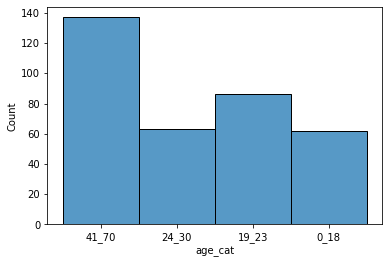

In [27]:
sns.histplot(agg_df["age_cat"])